Data Preprocessing and Exploratory Data Analysis

Step 1. Import Libraries 
Step 2. Load the Dataset 
Step 3. Data Cleaning:

    3A. Check for Missing Values 
    3B. Check for Duplicates 
    3C. Data Type Correction 
    3D. Outlier Detection and Treatment 
    3E. Data Normalization and Feature Scaling 

Step 4. Exploratory Data Analysis (EDA):

    4A. Univariate Analysis
    4B. Bivariate Analysis 
    4C. Correlation Analysis 
    4D. Feature Relationships 

Step 5. Insights and Summary 

Step 1. Import Libraries

In [24]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

Step 2. Load the Dataset 

In [25]:
# load dataset
#read dataset
import pandas as pd
df=pd.read_csv("../data/raw/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
#describe dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [27]:
# describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Step 3. Data Cleaning

3A. Check for Missing Values

In [28]:
# check missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

3B. Check for Duplicates

In [29]:
# Find duplicate values
df.duplicated().sum()

np.int64(0)

3C. Data Type Correction

In [30]:
# convert object to string
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [31]:
#  Fill zero values in Cholestrol and Resting BP 
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())
df.to_csv('../data/processed/data_abnormal_values_treated.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


 3D. Outlier Detection and Treatment

In [32]:
# Capping Outliers

# List of numeric columns to process
numeric_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Function to cap outliers based on IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply capping to all numeric features
for feature in numeric_features:
   df = cap_outliers(df, feature)

print("Outliers have been capped successfully!")


Outliers have been capped successfully!


In [34]:
#visualize impact of outlier treatment
cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

for c in cols:
    fig = px.box(df, 
                 y=c, 
                 x="HeartDisease", 
                 color="HeartDisease",
                 color_discrete_map={0:'blue', 1:'pink'},
                 title=f"Distribution of {c} by Heart Disease")
    fig.show()

Distribution by Age, RestingBP, Cholesterol, MaxHR, Oldpeak
- there appears to be a trend of higher age, max HR, and greater old peak in the heart disease group. it is difficult to see visually if there is a difference related to resting heart rate.

3E. Data Normalization and Feature Scaling

In [35]:
# data normalization and standard scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[num_cols] = scaler.fit_transform(df[num_cols])
df.to_csv('../data/processed/data_abnormal_values_treated_scaled.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.463654,0.876016,0,Normal,1.384080,N,-0.851276,Up,0
1,-0.478484,F,NAP,1.641229,-1.194233,0,Normal,0.754610,N,0.118532,Flat,1
2,-1.751359,M,ATA,-0.125133,0.762057,0,ST,-1.527219,N,-0.851276,Up,0
3,-0.584556,F,ASY,0.345897,-0.548467,0,Normal,-1.133801,Y,0.603436,Flat,1
4,0.051881,M,NAP,1.052442,-0.909337,0,Normal,-0.583014,N,-0.851276,Up,0


Findings so far :
1. 918 entries, 0 to 917;  Data columns (total 12 columns)
2. No null values found
3. No duplicate values
4. Age, Resting BP, Cholestrol, Fasting Blood Sugar, Max HR, Heart Disease - Integers ; OldPeak -Float
   Sex, ChestPainType, Resting ECG, Exercise Angina, ST_slope - Objjects converted to string
5. Column	Number of outliers capped:
   Age	0; RestingBP	28; Cholesterol	183; MaxHR	2; Oldpeak	16



Step 4. Exploratory Data Analysis (EDA)

4A. Univariate Analysis

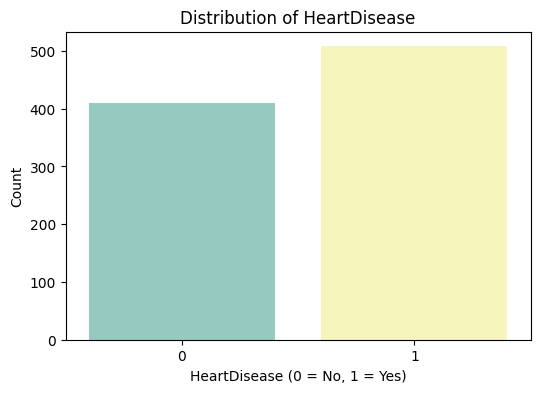

In [36]:
# Distribution of HeartDisease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HeartDisease', palette='Set3')
plt.title("Distribution of HeartDisease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Exploratory data analysis

Class distribution of stroke

This bar plot shows the distribution of the target variable 'Heart Disease' across the dataset. As observed, the class distribution is highly balanced. 508 individuals have heart disease. 410 individuals do not have heart disease. 

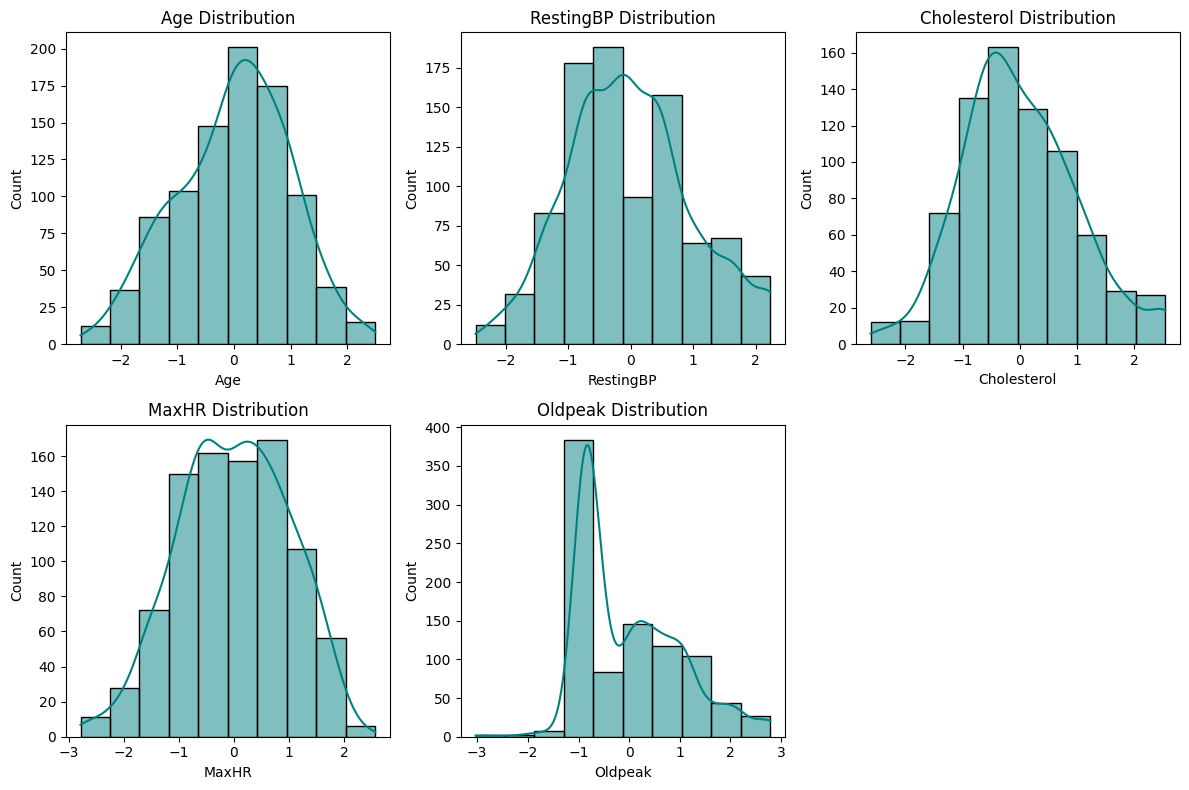

In [37]:
# Distribution of Numerical Features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 8))
for index, feature in enumerate(numeric_features):
    plt.subplot(2, 3, index + 1)
    sns.histplot(
        data=df,        
        x=feature,
        kde=True,
        bins=10,
        color='teal' 
    )
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

Distribution of the variables. Most variable appear to be normally distributed, aside from old peak which is dominated by -1. Old peak is ST depression induced by exercise relative to rest

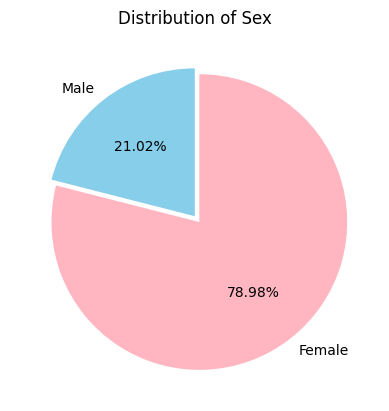

In [38]:
# Distribution of Categorical Variables

# Pie chart for Sex
df.groupby('Sex').size().plot(
    kind="pie",
    autopct="%.2f%%",   
    labels=['Male','Female'],  
    colors=['skyblue', 'lightpink'],  
    startangle=90,  
    explode=(0, 0.05)  
    )

plt.title("Distribution of Sex")
plt.ylabel('')  # remove default y-label
plt.show()

There are more females in the dataset

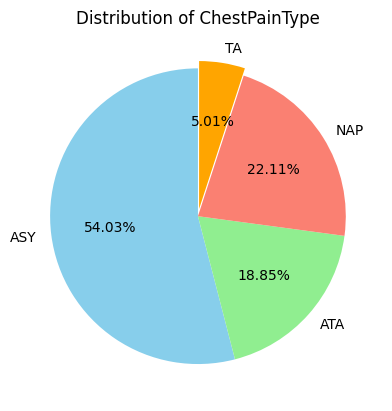

In [39]:
# Pie chart for CheestPainType
import matplotlib.pyplot as plt

# Define a color palette
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']  

# Pie chart for ChestPainType
df.groupby('ChestPainType').size().plot(
    kind="pie",
    autopct="%.2f%%",   
    colors=colors,
    startangle=90,      
    explode=(0, 0, 0, 0.05)  
)

plt.title("Distribution of ChestPainType")
plt.ylabel('')  
plt.show()


In terms of chest pain type, msot people do not have any chest pain. This is followed by non-angina chest pain, and then atypical chest pain. Very small smaple of 5% actually have typical chest pain.

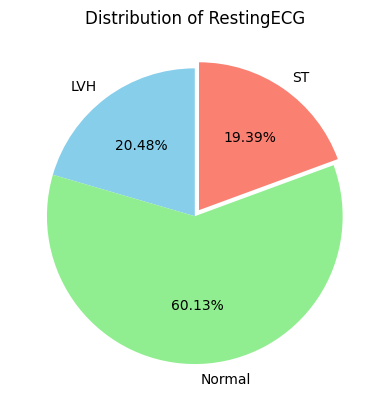

In [40]:
# Pie chart for RestingECG
import matplotlib.pyplot as plt

# Define colors for each category
colors = ['skyblue', 'lightgreen', 'salmon']  # one color per category

# Pie chart for RestingECG
df.groupby('RestingECG').size().plot(
    kind="pie",
    autopct="%.2f%%",   # show percentages
    colors=colors,
    startangle=90,      # rotate chart for better orientation
    explode=(0, 0, 0.05)  # optional: slightly pull out one slice
)

plt.title("Distribution of RestingECG")
plt.ylabel('')  # remove y-label
plt.show()


In terms of resting ECG, most are normal. ST-T wave abnormality and left ventricular hypertrophy are similar in proportion.

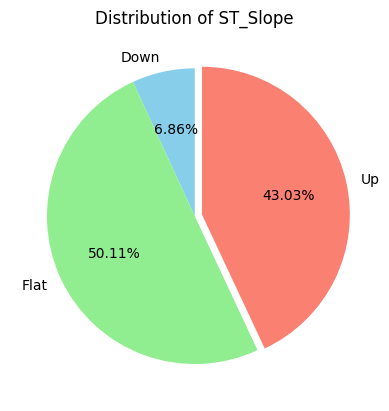

In [41]:
# Pie chart for ST_Slope
import matplotlib.pyplot as plt

# Define colors for each category
colors = ['skyblue', 'lightgreen', 'salmon']  # one color per ST_Slope category

# Pie chart for ST_Slope
df.groupby('ST_Slope').size().plot(
    kind="pie",
    autopct="%.2f%%",   # show percentages
    colors=colors,
    startangle=90,      # rotate chart for better orientation
    explode=(0, 0, 0.05)  # optional: slightly pull out one slice
)

plt.title("Distribution of ST_Slope")
plt.ylabel('')  # remove default y-label
plt.show()


In terms of ST slope, about half are flat. 43% are up and 6.9% are down.

  4B. Bivariate Analysis

In [42]:
# Bivariate Analysis
 # Check various categories present in the different categorical columns
categorical_variables = df.dtypes.index[df.dtypes == 'string'].tolist()
for feature in categorical_variables:
    print(f"Feature {feature} - {df[feature].unique()}")  

Feature Sex - <StringArray>
['M', 'F']
Length: 2, dtype: string
Feature ChestPainType - <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string
Feature RestingECG - <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string
Feature ExerciseAngina - <StringArray>
['N', 'Y']
Length: 2, dtype: string
Feature ST_Slope - <StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string


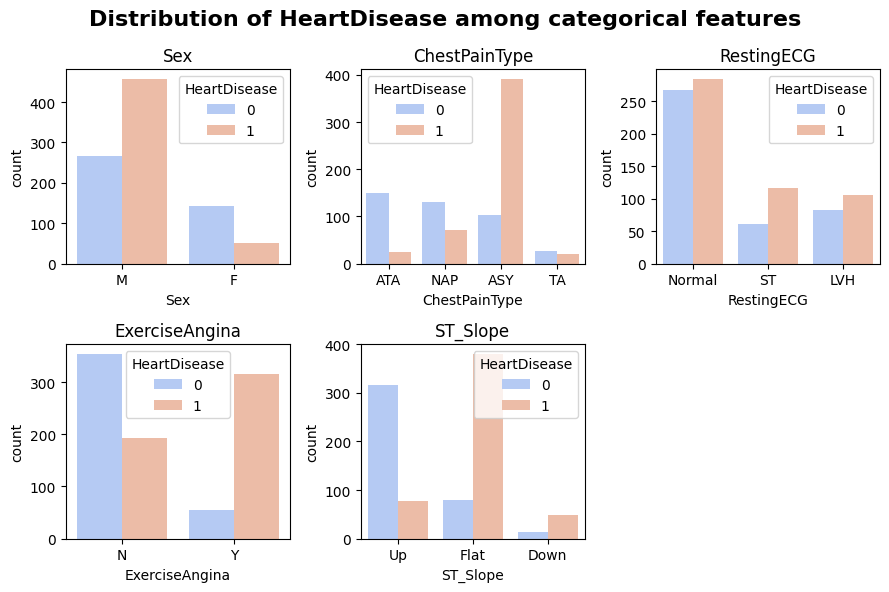

In [43]:
# Bivariate Analysis

import math

# Determine number of plots dynamically
num_features = len(categorical_variables)
cols = 3
rows = math.ceil(num_features / cols)

# Set up the figure
fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each categorical variable
for ax, feature in zip(axes, categorical_variables):
    sns.countplot(
        data=df,
        x=feature,
        hue="HeartDisease",
        ax=ax,
        palette='coolwarm'  # 💡 change color theme here
    )
    ax.set_title(f"{feature}")

fig.suptitle("Distribution of HeartDisease among categorical features", fontsize=16, weight='bold')

# Hide unused subplots if any
for ax in axes[num_features:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Distribution of Heart Disease Among Categorical Variables
- There are more males with heart disease than those that did not. This is the opposite for female, where there are more without heart disease.
- There appears to be a lot more people who are asymptomatic who have heart disease than those that did not. This is perhaps not as suprising as one would expect as the dataset is for heartfailure and most patients with heartfailure do not have any symptoms
- There are more patients with exercise angina that have chest pain than those who do not.
- Most patients who do not have heart disease have upward ST slope. Most people with heart disease have flat ST slope

**Insights derived from categorical data analysis**

1. The ratio of Male getting heart disease is higher than the Female.
2. People with chest pain type of "ASY: Asymptomatic", exercise-induced angina and ST_Slope of type "Flat" are more likely to get heart disease

In [44]:
# Converting categorical values to numeric values using OneHotEncoding method

df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})
df = pd.get_dummies(data=df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True, dtype=int)
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.463654,0.876016,0,1.384080,0,-0.851276,0,1,0,0,1,0,0,1
1,-0.478484,1,1.641229,-1.194233,0,0.754610,0,0.118532,1,0,1,0,1,0,1,0
2,-1.751359,0,-0.125133,0.762057,0,-1.527219,0,-0.851276,0,1,0,0,0,1,0,1
3,-0.584556,1,0.345897,-0.548467,0,-1.133801,1,0.603436,1,0,0,0,1,0,1,0
4,0.051881,0,1.052442,-0.909337,0,-0.583014,0,-0.851276,0,0,1,0,1,0,0,1


4C. Correlation Analysis

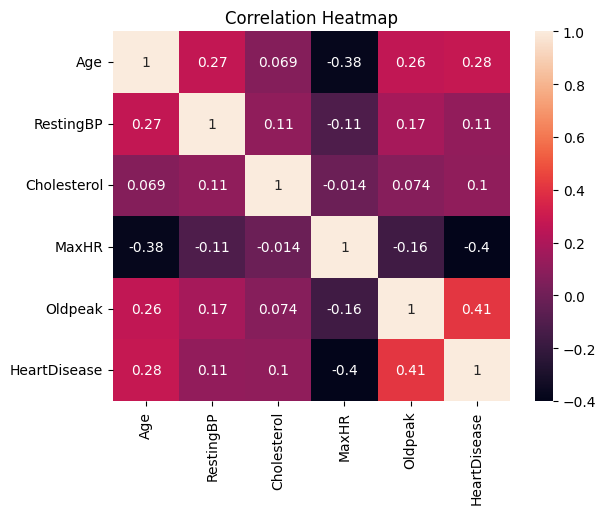

In [45]:
#  Correlation Analysis
# Heatmap to visualize the relationship between numeric variables along with target variables
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
corr = df[numeric_features + ['HeartDisease']].corr()
sns.heatmap(data=corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()



Interpretations:

1. Age vs HeartDisease (0.28) - Weak positive correlation: older individuals have slightly higher risk of heart disease.
2. RestingBP vs HeartDisease (0.11) - Weak positive correlation: blood pressure has minimal linear association in this dataset. 
3. Cholesterol vs HeartDisease (0.08) - Cholesterol alone may not predict heart disease strongly here.
4. MaxHR vs HeartDisease (-0.4) - Moderate negative correlation suggesting higher maximum heart rate during exercise is associated with lower heart disease risk
5. Oldpeak vs HeartDisease (0.41) - Moderate positive correlation: more ST depression during exercise (Oldpeak) is associated with higher risk.

4D. Feature Relationships 

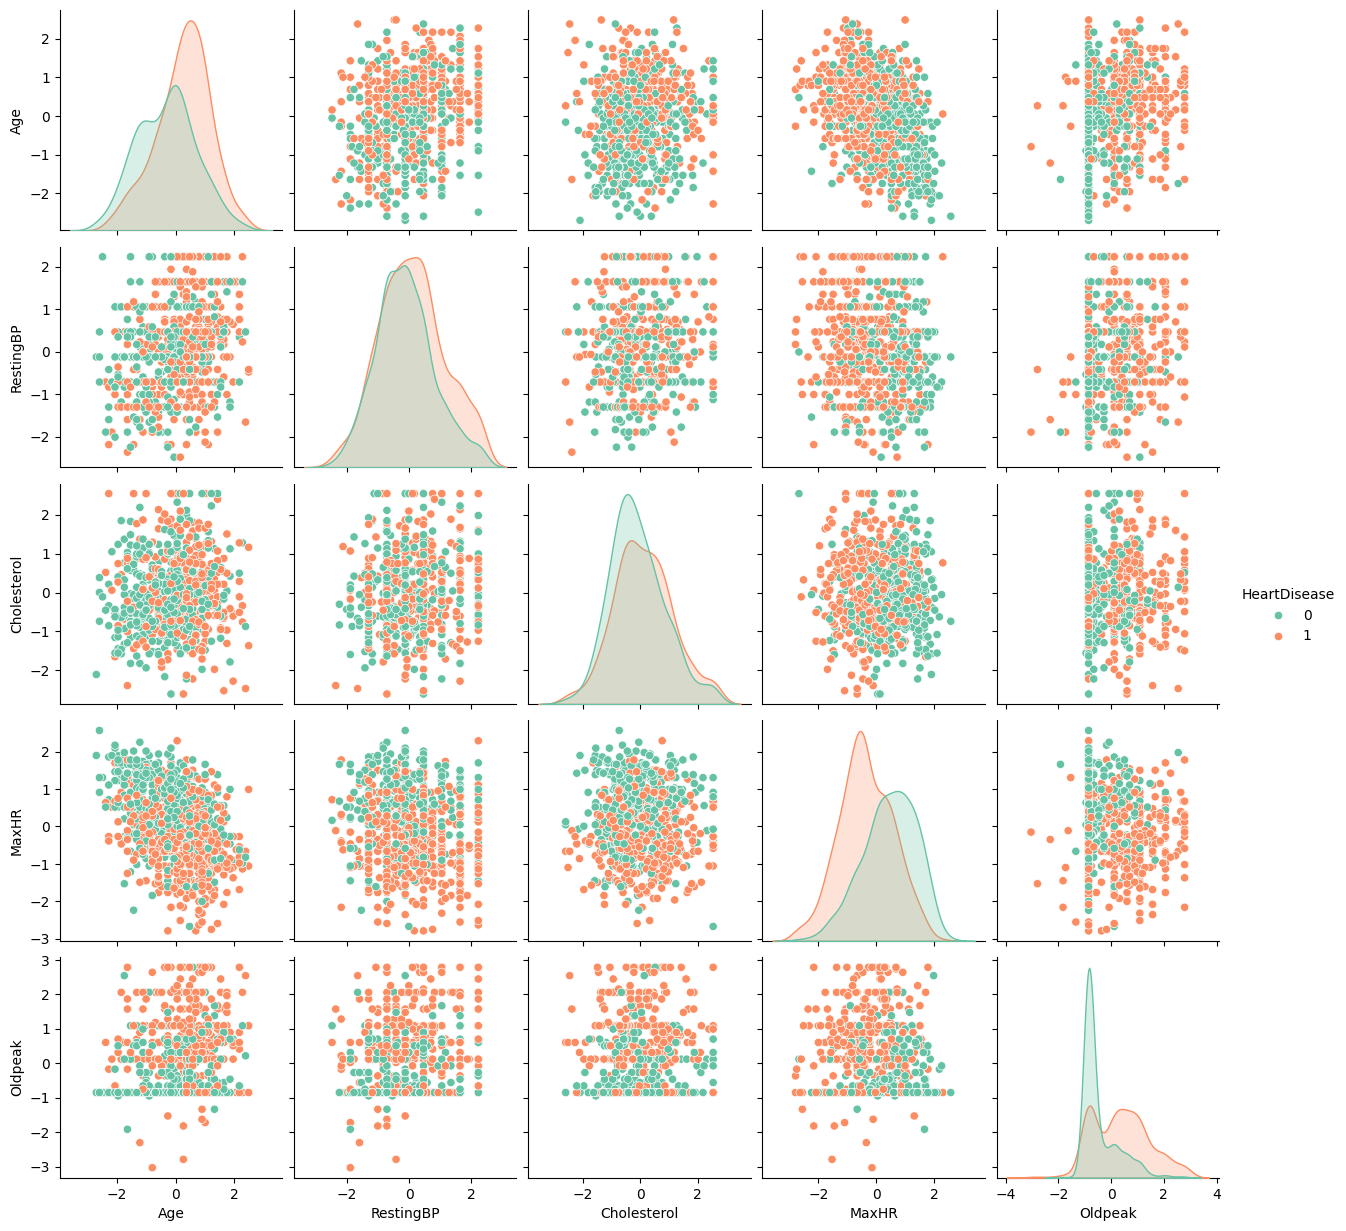

In [46]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

sns.pairplot(
    df[numeric_features + ['HeartDisease']],  # only numeric + target
    hue="HeartDisease",
    diag_kind="kde",
    palette="Set2"
)
plt.show()
